<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Reshape-data-to-have-single-channel" data-toc-modified-id="Reshape-data-to-have-single-channel-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Reshape data to have single channel</a></span></li><li><span><a href="#Normalize-the-data" data-toc-modified-id="Normalize-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Normalize the data</a></span></li></ul></li><li><span><a href="#Define-Model" data-toc-modified-id="Define-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define Model</a></span></li><li><span><a href="#Compile-the-model" data-toc-modified-id="Compile-the-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compile the model</a></span></li><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Fit the model</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Model-Prediction" data-toc-modified-id="Model-Prediction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Prediction</a></span></li></ul></div>

# Data

Here we will be using the MNIST dataset. Model will be of the form:<br>
Input -> (Con2d(32 filters(3x3) -> MaxPool(2x2)) -> Flatten -> Dense(100) with dropout(0.5) -> Output  

Here the CNN model expects the data(images) in channels-last form, where channel represents the color channels present of the input image.

# Data preprocessing 

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf

import numpy as np
from matplotlib import pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
X_train = np.subtract(255, X_train)

In [4]:
X_test = np.subtract(255, X_test)

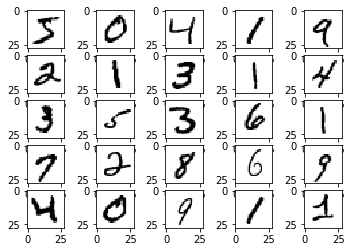

In [5]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

## Reshape data to have single channel

In [6]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [7]:
no_feature = X_train.shape[1:]
classes = len(np.unique(y_train))
print(no_feature)
print(classes)

(28, 28, 1)
10


## Normalize the data

In [8]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') /255.0

# Define Model

In [9]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=no_feature));
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

# Compile the model

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fit the model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size = 32, verbose = 1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0637 - accuracy: 0.9789
Epoch 2/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0627 - accuracy: 0.9785
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0577 - accuracy: 0.9808
Epoch 4/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0527 - accuracy: 0.9822
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0510 - accuracy: 0.9827
Epoch 6/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0477 - accuracy: 0.9836
Epoch 7/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0453 - accuracy: 0.9848
Epoch 8/10
53216/60000 [=========================>....] - ETA: 0s - loss: 0.0429 - accuracy: 0.9848

# Model Evaluation

In [12]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Model Prediction

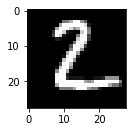

2 2


In [29]:
X = X_test[1]
plt.subplot(2,2,1)
plt.imshow(X[:,:,0], cmap=plt.get_cmap('gray'))
plt.show()
y = model.predict([[X]])
print(np.argmax(y), y_test[1])